# Star Wars Survey

### Do people realize that “The Empire Strikes Back” is clearly the best of the bunch?

[similar](https://github.com/dataquestio/solutions/blob/master/Mission201Solution.ipynb), 
[more](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
lnk = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv'
df = pd.read_csv(lnk, encoding='Latin')

df.shape
# df.columns
# df.info()
# df.iloc[[5]]

(1187, 38)

In [3]:
df[df['RespondentID'].isna()]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response


In [7]:
df = df[df['RespondentID'].notna()]

In [8]:
df.shape

(1186, 38)

* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?



Convert both columns to the Boolean type.

When you're finished, both columns should only contain the values True, False, and NaN.


In [9]:
df.iloc[[5]]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic


In [13]:
df.iloc[:,1]

1       Yes
2        No
3       Yes
4       Yes
5       Yes
6       Yes
7       Yes
8       Yes
9       Yes
10      Yes
11      Yes
12       No
13      Yes
14      Yes
15      Yes
16      Yes
17      Yes
18      Yes
19      Yes
20      Yes
21      Yes
22      Yes
23      Yes
24      Yes
25      Yes
26       No
27      Yes
28      Yes
29      Yes
30      Yes
       ... 
1157    Yes
1158     No
1159    Yes
1160     No
1161    Yes
1162    Yes
1163    Yes
1164    Yes
1165    Yes
1166    Yes
1167    Yes
1168    Yes
1169     No
1170    Yes
1171     No
1172    Yes
1173    Yes
1174    Yes
1175    Yes
1176    Yes
1177    Yes
1178    Yes
1179     No
1180    Yes
1181    Yes
1182    Yes
1183    Yes
1184     No
1185    Yes
1186    Yes
Name: Have you seen any of the 6 films in the Star Wars franchise?, Length: 1186, dtype: object

In [15]:
df.iloc[:,1].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [16]:
df.iloc[:,2].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [18]:
my_mapping = {
    'Yes' : True,
    'No'  : False,
     np.NaN  : np.NaN,
}

df.iloc[:,1] = df.iloc[:,1].map(my_mapping)
df.iloc[:,2] = df.iloc[:,2].map(my_mapping)

In [19]:
df.iloc[:,1].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [20]:
df.iloc[:,2].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

<div><p>The next six columns represent a single checkbox question.  The respondent checked off a series of boxes in response to the question, <code>Which of the following Star Wars films have you seen? Please select all that apply.</code></p>
<p>The columns for this question are:</p>
<ul>
<li><code>Which of the following Star Wars films have you seen? Please select all that apply.</code>  - Whether or not the respondent saw <code>Star Wars: Episode I  The Phantom Menace</code>.</li>
<li><code>Unnamed: 4</code> - Whether or not the respondent saw <code>Star Wars: Episode II  Attack of the Clones</code>.</li>
<li><code>Unnamed: 5</code> - Whether or not the respondent saw <code>Star Wars: Episode III  Revenge of the Sith</code>.</li>
<li><code>Unnamed: 6</code> - Whether or not the respondent saw <code>Star Wars: Episode IV  A New Hope</code>.</li>
<li><code>Unnamed: 7</code> - Whether or not the respondent saw <code>Star Wars: Episode V The Empire Strikes Back</code>.</li>
<li><code>Unnamed: 8</code> - Whether or not the respondent saw <code>Star Wars: Episode VI Return of the Jedi</code>.</li>
</ul>
<p>For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie.  If the value is <code>NaN</code>, the respondent either didn't answer or didn't see the movie.  We'll assume that they didn't see the movie.</p>
<p>We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive.  We can convert the values the same way we did earlier, except that we'll need to include the movie title and <code>NaN</code> in the mapping dictionary.</p>
</div>

In [29]:
df.iloc[:,3].str.contains('Star', na=False).value_counts(dropna=False)

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

In [30]:
# Converting column contents from movie names, NaNs to True and False
# This will add True where the title has 'Star' and will convert na to False

df.iloc[:,3] = df.iloc[:,3].str.contains('Star', na=False)
df.iloc[:,4] = df.iloc[:,4].str.contains('Star', na=False)
df.iloc[:,5] = df.iloc[:,5].str.contains('Star', na=False)
df.iloc[:,6] = df.iloc[:,6].str.contains('Star', na=False)
df.iloc[:,7] = df.iloc[:,7].str.contains('Star', na=False)
df.iloc[:,8] = df.iloc[:,8].str.contains('Star', na=False)

In [34]:
for i in range(3,9):
    print(df.iloc[:,i].value_counts())

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
True     758
False    428
Name: Unnamed: 7, dtype: int64
True     738
False    448
Name: Unnamed: 8, dtype: int64


In [36]:
# df.columns
rename_dict = {
    'Which of the following Star Wars films have you seen? Please select all that apply.' : 'seen_1',
    'Unnamed: 4' : 'seen_2',
    'Unnamed: 5' : 'seen_3',
    'Unnamed: 6' : 'seen_4',
    'Unnamed: 7' : 'seen_5',
    'Unnamed: 8' : 'seen_6',
    }

df.rename(columns=rename_dict, inplace=True)

In [38]:
df.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

<div>
    <p>The next six columns ask the respondent to rank the <em>Star Wars</em> movies in order of least favorite to most
        favorite. <code>1</code> means the film was the most favorite, and <code>6</code> means it was the least
        favorite. Each of the following columns can contain the value <code>1</code>, <code>2</code>, <code>3</code>,
        <code>4</code>, <code>5</code>, <code>6</code>, or <code>NaN</code>:</p>
    <ul>
        <li><code>Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.</code>- How much the respondent liked <code>Star Wars: Episode I  The Phantom Menace</code></li>
        <li><code>Unnamed: 10</code> - How much the respondent liked
            <code>Star Wars: Episode II  Attack of the Clones</code></li>
        <li><code>Unnamed: 11</code> - How much the respondent liked
            <code>Star Wars: Episode III  Revenge of the Sith</code></li>
        <li><code>Unnamed: 12</code> - How much the respondent liked <code>Star Wars: Episode IV  A New Hope</code></li>
        <li><code>Unnamed: 13</code> - How much the respondent liked
            <code>Star Wars: Episode V The Empire Strikes Back</code></li>
        <li><code>Unnamed: 14</code> - How much the respondent liked
            <code>Star Wars: Episode VI Return of the Jedi</code></li>
    </ul>
    <p>Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type,
        though, then rename the columns so that we can tell what they represent more easily.</p>
    <p>We can do the numeric conversion with the <a target="_blank"
            href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html">pandas.DataFrame.astype()</a>
        method on dataframes. In this case, we can use code that looks like this:</p>
</div>
<div>star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)</div>
<p>The code above will convert column <code>9</code> up to but not including column <code>15</code> to the float
    data type.</p>

<ul>
    <li>Convert each of the columns above to a <code>float</code> type.<ul>
            <li>You can select all of the column names with <code>star_wars.columns[9:15]</code>, rather than
                typing each one in.</li>
        </ul>
    </li>
    <li>Give each column a more descriptive name. We suggest <code>ranking_1</code>, <code>ranking_2</code>, and
        so on.<ul>
            <li>You can use the <code>df.rename()</code> method from the last screen to accomplish this.</li>
    </li>
</ul>

In [41]:
df[df.columns[9:15]] = df[df.columns[9:15]].astype(float)

In [43]:
df[df.columns[9:15]].dtypes

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    float64
Unnamed: 10                                                                                                                                      float64
Unnamed: 11                                                                                                                                      float64
Unnamed: 12                                                                                                                                      float64
Unnamed: 13                                                                                                                                      float64
Unnamed: 14                                                                                                                                      float64
dtype: object

In [53]:
old_names = df.columns[9:15]
new_names = ['ranking_{}'.format(i) for i in range(1,7)]

ren_dict = dict(zip( old_names, new_names ))

df.rename(columns=ren_dict, inplace=True)

In [54]:
df.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

<p> Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, take
       <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html">pandas.DataFrame.mean()</a>
    method on dataframes.</p>

<ul>
    <li>Use the <code>pandas.DataFrame.mean()</code> method to compute the mean of each of the
        <code>ranking</code> columns from the last screen.</li>
    <li>Make a bar chart of each seen. You can use a matplotlib <a target="_blank"
            href="http://matplotlib.org/examples/api/barchart_demo.html">bar chart</a> for this.<ul>
            <li>Make sure to run <code>%matplotlib inline</code> beforehand to show your plots in the notebook.
            </li>
        </ul>
    </li>
    <li>Write up a summary of what you've done so far in a Markdown cell. Also discuss why you think the
        respondents ranked the movies the way they did.<ul>
            <li>Remember that a lower ranking is better!</li>
        </ul>
    </li>
</ul>

In [56]:
[i for i in df.columns if 'ranking' in i]

['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']

In [57]:
df.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

In [60]:
df[df.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

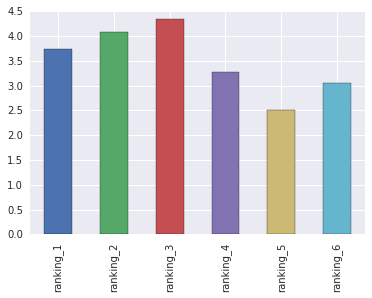

In [62]:
df[df.columns[9:15]].mean().plot(kind='bar')

1. Star Wars: Episode I The Phantom Menace
1. Star Wars: Episode II Attack of the Clones
1. Star Wars: Episode III Revenge of the Sith
1. Star Wars: Episode IV A New Hope
1. Star Wars: Episode V The Empire Strikes Back
1. Star Wars: Episode VI Return of the Jedi

<div><p>Earlier in this project, we cleaned up the <code>seen</code> columns and converted their values to the Boolean type.  When we call methods like <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html">pandas.DataFrame.sum()</a> or <code>mean()</code>, they treat Booleans like integers.  They consider <code>True</code> a <code>1</code>, and <code>False</code> a <code>0</code>.  That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).</p></div></div></div><div class="ScrollAccordion__section"><div theme="dark" class="ScrollAccordion__in_text SidePanelTitle__dark" style="opacity: 1;" id="onboarding-tip-instructions">instructions</div><iframe style="height: 100%; width: 100%; border: medium none; background: transparent none repeat scroll 0% 0%; position: absolute; z-index: -1; top: 0px; left: 0px;"></iframe><div id="body" class="MissionLearn__instructions MissionMarkup__dark"><ul>
<li>Use the <code>df.sum()</code> method to compute the sum of each of the <code>seen</code> columns.</li>
<li>Make a bar chart of each ranking.  You can use a matplotlib <a target="_blank" href="http://matplotlib.org/examples/api/barchart_demo.html">bar chart</a> for this.</li>
<li>Write up your thoughts on why the results look the way they do in a Markdown cell.  Also discuss how the results correlate with the rankings.</li>
</ul></div>

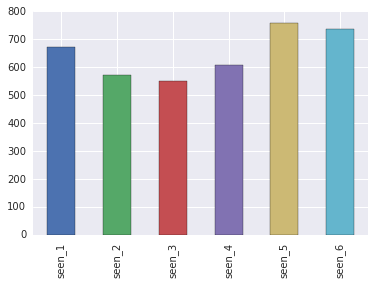

In [66]:
df[df.columns[3:9]].sum().plot(kind='bar')

1. Star Wars: Episode I The Phantom Menace
1. Star Wars: Episode II Attack of the Clones
1. Star Wars: Episode III Revenge of the Sith
1. Star Wars: Episode IV A New Hope
1. Star Wars: Episode V The Empire Strikes Back
1. Star Wars: Episode VI Return of the Jedi

---

<div>
    <p>We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain
        segments of the survey population responded. There are several columns that segment our data into two groups.
        Here are a few examples: </p>
    <ul>
        <li><code>Do you consider yourself to be a fan of the Star Wars film franchise?</code> - True or False</li>
        <li><code>Do you consider yourself to be a fan of the Star Trek franchise?</code> - <code>Yes</code> or
            <code>No</code></li>
        <li><code>Gender</code> - <code>Male</code> or <code>Female</code></li>
    </ul>
    <p>We can split a dataframe into two groups based on a binary column by creating two subsets of that column. For
        example, we can split on the <code>Gender</code> column like this:</p>
</div>
<p>males = star_wars[star_wars["Gender"] == "Male"]</p>
<p>females = star_wars[star_wars["Gender"] == "Female"]</p><br>

<div>
    <p>The subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics
        separately for each group.</p>
</div>
</div>
</div>
<div class="ScrollAccordion__section">
    <div id="body" class="MissionLearn__instructions MissionMarkup__dark">
        <ul>
            <li>Split the data into two groups based on one of the binary columns above.</li>
            <li>Redo the two previous analyses (find the most viewed movie and the highest-ranked movie) separately for
                each group, and then compare the results. </li>
            <li>If you see any interesting patterns, write about them in a Markdown cell.</li>
        </ul>
    </div>

In [73]:
# Males:

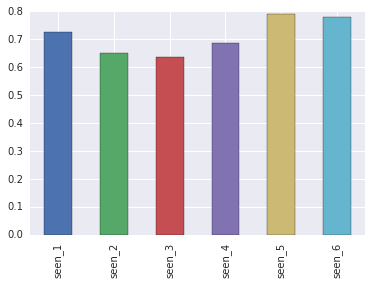

In [75]:
# Seens :

df[df['Gender']=='Male'].iloc[:,3:9].mean().plot(kind='bar')

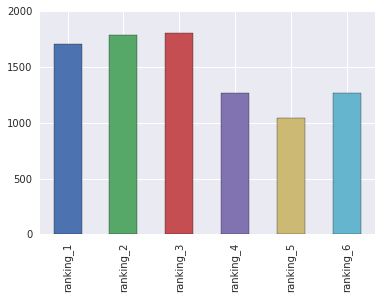

In [77]:
# Ranking:
df[df['Gender']=='Male'].iloc[:,9:15].sum().plot.bar()

In [73]:
# Females:

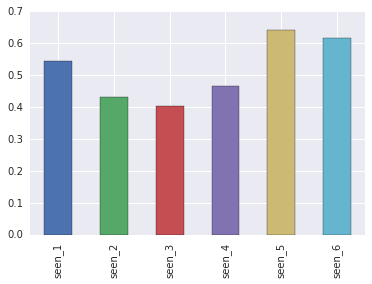

In [78]:
# Seens :

df[df['Gender']=='Female'].iloc[:,3:9].mean().plot(kind='bar')

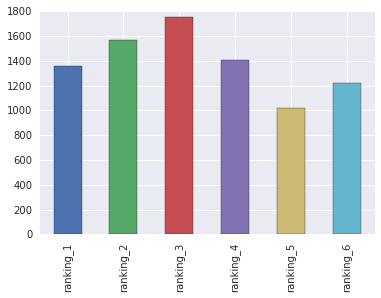

In [79]:
# Ranking:
df[df['Gender']=='Female'].iloc[:,9:15].sum().plot.bar()

---

In [81]:
sns.displot(
    df, x="Gender", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

AttributeError: 'module' object has no attribute 'displot'

Here are some potential next steps:

    Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
    Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
        Which character do respondents like the most?
        Which character do respondents dislike the most?
        Which character is the most controversial (split between likes and dislikes)?
